# Traditional ML

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, ConfusionMatrixDisplay
from sklearn.ensemble import RandomForestClassifier

In [2]:
df = pd.read_csv("WA_Fn-UseC_-Telco-Customer-Churn.csv")
print("Initial shape:", df.shape)
df.head()

Initial shape: (7043, 21)


,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [3]:
# Drop customerID since it's not useful for prediction
df = df.drop(columns=["customerID"])

# Replace blank spaces in 'TotalCharges' with NaN and convert to numeric
df["TotalCharges"] = df["TotalCharges"].replace(" ", np.nan)
df["TotalCharges"] = pd.to_numeric(df["TotalCharges"])

# Drop rows with missing TotalCharges
df = df.dropna(subset=["TotalCharges"])

# Reset index after dropping
df = df.reset_index(drop=True)
print("After cleaning:", df.shape)

After cleaning: (7032, 20)


In [4]:
# Encode target: Yes = 1, No = 0
df["Churn"] = df["Churn"].map({"Yes": 1, "No": 0})

In [5]:
# Identify categorical and numeric columns
cat_cols = df.select_dtypes(include=["object"]).columns
num_cols = df.select_dtypes(exclude=["object"]).columns

print("Categorical columns:", list(cat_cols))
print("Numeric columns:", list(num_cols))

# One-hot encode categorical variables
df_encoded = pd.get_dummies(df, columns=cat_cols, drop_first=True)

print("Encoded dataset shape:", df_encoded.shape)

Categorical columns: ['gender', 'Partner', 'Dependents', 'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod']
Numeric columns: ['SeniorCitizen', 'tenure', 'MonthlyCharges', 'TotalCharges', 'Churn']
Encoded dataset shape: (7032, 31)


In [7]:
X = df_encoded.drop(columns=["Churn"])
y = df_encoded["Churn"]

X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.2,
    random_state=42,
    stratify=y
)
print("Train shape:", X_train.shape)
print("Test shape:", X_test.shape)

Train shape: (5625, 30)
Test shape: (1407, 30)


In [13]:
rf_clf = RandomForestClassifier(
    n_estimators=200,
    max_depth=None,
    random_state=42
)
rf_clf.fit(X_train, y_train)

,n_estimators,200
,criterion,'gini'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,'sqrt'
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,bootstrap,True
,oob_score,False


Random Forest Classifier Performance:
Accuracy : 0.787
Precision: 0.623
Recall   : 0.508
F1-score : 0.560


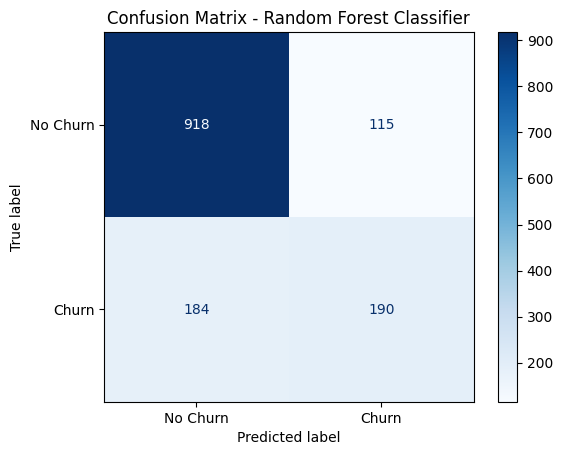

In [14]:
# Predictions
y_pred = rf_clf.predict(X_test)

# Metrics
acc  = accuracy_score(y_test, y_pred)
prec = precision_score(y_test, y_pred)
rec  = recall_score(y_test, y_pred)
f1   = f1_score(y_test, y_pred)

print("Random Forest Classifier Performance:")
print(f"Accuracy : {acc:.3f}")
print(f"Precision: {prec:.3f}")
print(f"Recall   : {rec:.3f}")
print(f"F1-score : {f1:.3f}")

# Confusion matrix
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=["No Churn", "Churn"])
disp.plot(cmap="Blues")
plt.title("Confusion Matrix - Random Forest Classifier")
plt.show()

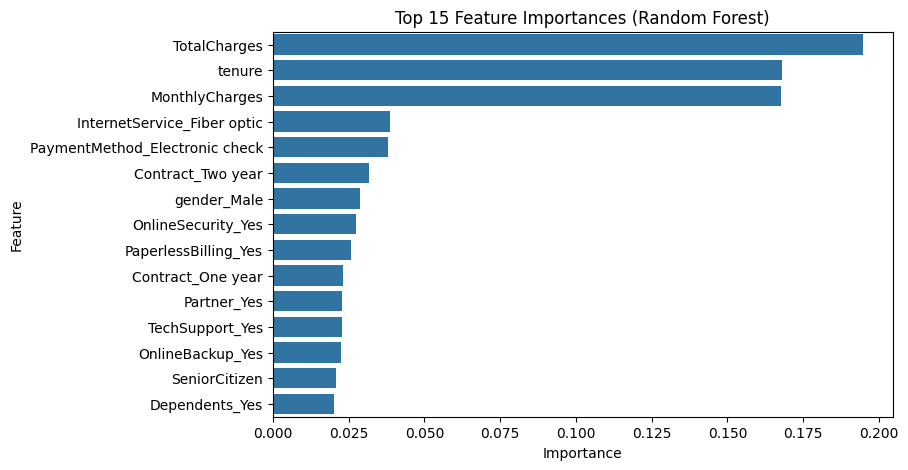

,Feature,Importance
3,TotalCharges,0.194808
1,tenure,0.167997
2,MonthlyCharges,0.167665
10,InternetService_Fiber optic,0.038761
28,PaymentMethod_Electronic check,0.037923
25,Contract_Two year,0.031715
4,gender_Male,0.028897
13,OnlineSecurity_Yes,0.027380
26,PaperlessBilling_Yes,0.025685
24,Contract_One year,0.023054


In [17]:
# Extract feature importances
feat_imp = pd.DataFrame({
    "Feature": X.columns,
    "Importance": rf_clf.feature_importances_
}).sort_values("Importance", ascending=False).head(15)

plt.figure(figsize=(8,5))
sns.barplot(x="Importance", y="Feature", data=feat_imp)
plt.title("Top 15 Feature Importances (Random Forest)")
plt.show()

feat_imp

## Feedforward Neural Network

In [20]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from sklearn.preprocessing import StandardScaler

In [21]:
# Features & target
X = df_encoded.drop(columns=["Churn"])
y = df_encoded["Churn"]

# Train/test split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.2,
    random_state=42,
    stratify=y
)

# Scale features for neural network
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled  = scaler.transform(X_test)

X_train_scaled.shape, X_test_scaled.shape

((5625, 30), (1407, 30))

In [42]:
input_dim = X_train_scaled.shape[1]

nn_model = keras.Sequential([
    layers.Input(shape=(input_dim,)),
    layers.Dense(128, activation="relu"),
    layers.Dropout(0.3),
    layers.Dense(64, activation="relu"),
    layers.Dropout(0.3),
    layers.Dense(32, activation="relu"),
    layers.Dropout(0.3),
    layers.Dense(1, activation="sigmoid")   # sigmoid for binary classification
])

nn_model.compile(
    optimizer=keras.optimizers.Adam(learning_rate=0.001),
    loss="binary_crossentropy",
    metrics=["accuracy"]
)

nn_model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_3 (Dense)                 │ (None, 128)            │         3,968 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_4 (Dropout)             │ (None, 32)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_6 (Dense)                 │ (None, 1)              │            33 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 14,337 (56.00 KB)

 Trainable params: 14,337 (56.00 KB)

 Non-trainable params: 0 (0.00 B)

In [44]:
history = nn_model.fit(
    X_train_scaled, y_train,
    validation_split=0.2,
    epochs=50,
    batch_size=32,
    verbose=1
)

Epoch 1/50
141/141 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.7640 - loss: 0.4822 - val_accuracy: 0.7973 - val_loss: 0.4134
Epoch 2/50
141/141 ━━━━━━━━━━━━━━━━━━━━ 0s 870us/step - accuracy: 0.7931 - loss: 0.4514 - val_accuracy: 0.7964 - val_loss: 0.4149
Epoch 3/50
141/141 ━━━━━━━━━━━━━━━━━━━━ 0s 852us/step - accuracy: 0.7962 - loss: 0.4426 - val_accuracy: 0.8000 - val_loss: 0.4118
Epoch 4/50
141/141 ━━━━━━━━━━━━━━━━━━━━ 0s 849us/step - accuracy: 0.8011 - loss: 0.4258 - val_accuracy: 0.8027 - val_loss: 0.4060
Epoch 5/50
141/141 ━━━━━━━━━━━━━━━━━━━━ 0s 842us/step - accuracy: 0.7989 - loss: 0.4249 - val_accuracy: 0.8053 - val_loss: 0.4087
Epoch 6/50
141/141 ━━━━━━━━━━━━━━━━━━━━ 0s 831us/step - accuracy: 0.7982 - loss: 0.4264 - val_accuracy: 0.8062 - val_loss: 0.4101
Epoch 7/50
141/141 ━━━━━━━━━━━━━━━━━━━━ 0s 820us/step - accuracy: 0.8049 - loss: 0.4248 - val_accuracy: 0.7982 - val_loss: 0.4147
Epoch 8/50
141/141 ━━━━━━━━━━━━━━━━━━━━ 0s 821us/step - accuracy: 0.8096 - loss: 0.4214 - va

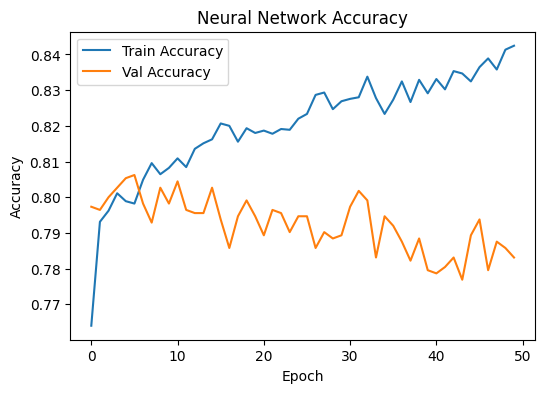

In [46]:
plt.figure(figsize=(6,4))
plt.plot(history.history["accuracy"], label="Train Accuracy")
plt.plot(history.history["val_accuracy"], label="Val Accuracy")
plt.title("Neural Network Accuracy")
plt.xlabel("Epoch")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

44/44 ━━━━━━━━━━━━━━━━━━━━ 0s 891us/step
Neural Network Classifier Performance:
Accuracy : 0.779
Precision: 0.596
Recall   : 0.521
F1-score : 0.556


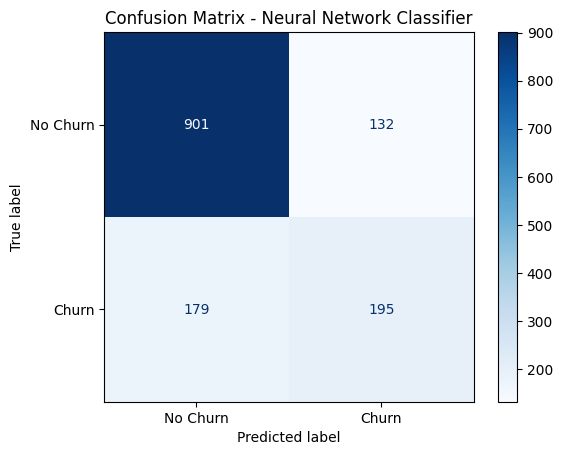

In [48]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, ConfusionMatrixDisplay
import numpy as np

# Predict probabilities → convert to class labels (0/1)
y_pred_prob = nn_model.predict(X_test_scaled)
y_pred = (y_pred_prob > 0.5).astype(int).flatten()

acc  = accuracy_score(y_test, y_pred)
prec = precision_score(y_test, y_pred)
rec  = recall_score(y_test, y_pred)
f1   = f1_score(y_test, y_pred)

print("Neural Network Classifier Performance:")
print(f"Accuracy : {acc:.3f}")
print(f"Precision: {prec:.3f}")
print(f"Recall   : {rec:.3f}")
print(f"F1-score : {f1:.3f}")

# Confusion matrix
cm = confusion_matrix(y_test, y_pred)
ConfusionMatrixDisplay(cm, display_labels=["No Churn", "Churn"]).plot(cmap="Blues")
plt.title("Confusion Matrix - Neural Network Classifier")
plt.show()